In [ ]:
def total_energy(s, X, Y):
  energy = 0 
  bonds = []
  points = zip(s, X, Y)
  points = ([(h,x,y) for (h,x,y) in points])
  visited = []
  for i, (h, x, y) in enumerate(points): #for each point on the restriced random walk
    if h == "H":
      for neighbor in [('H', x+1, y), ('H', x-1, y), ('H', x, y+1), ('H', x, y-1),]: #na 6 sąsiadów
        if i > 1 and  i < len(s) - 1:
          if neighbor in points and neighbor  != ('H', X[(i+1)], Y[(i + 1)]) and neighbor  != ('H', X[(i-1)], Y[(i - 1)]) and [(x, y), (neighbor[1], neighbor[2])] not in bonds: #checks if the neighbor is in the restriced random walk  
            energy -= 1
            bonds.append([(neighbor[1], neighbor[2]), (x, y)])
  return energy, np.asarray(bonds)



def repeat(X, Y, x, y, i):
  for j in range(i):
    if(X[j] == x and Y[j] == y) :
      return (True)
  
  return (False)
  
direction_x = (1,-1,0,0)
direction_y = (0,0,1,-1)

import numpy as np 

import random 
import math 
def simulation(k, s):
  n = 10**5 
  W = np.zeros(n) #weights
  energy = np.zeros(n)
  trajectories = np.zeros((n, k, 2))

  for i in range(n):
    X = np.zeros(k)
    Y = np.zeros(k)
    W[i] = 1
    for j in range(1, k + 1):
      # we check which movement numbers are acceptable
      positions = []
      if(not repeat(X, Y, X[j-1]+direction_x[0], Y[j-1] + direction_y[0], j-1) ):
        positions.append(0)
      if(not repeat(X, Y, X[j-1]+direction_x[1], Y[j-1] + direction_y[1], j-1) ):
        positions.append(1)
      if(not repeat(X, Y, X[j-1]+direction_x[2], Y[j-1] + direction_y[2], j-1) ):
        positions.append(2)
      if(not repeat(X, Y, X[j-1]+direction_x[3], Y[j-1] + direction_y[3], j-1) ):
        positions.append(3)
      ###
      if( len(positions) == 0 ):
        W[i] = 0
        break
      ###
      else:
        W[i] = W[i] * len(positions)
        U = random.choice(positions)
        if j == k:
          break
        X[j] = X[j-1] + direction_x[U]
        Y[j] = Y[j-1] + direction_y[U]
    if W[i] != 0:
      energy[i], _ = total_energy(s, X, Y) 
      trajectories[i,:,0] = X
      trajectories[i,:,1] = Y

  return (stat.mean(W), energy, trajectories)

dimension:18, count of self avoiding random walk: 125253209.47464, -3.0
dimension:18, count of self avoiding random walk: 124733316.62196, -7.0
dimension:18, count of self avoiding random walk: 124948202.93136, -8.0
dimension:20, count of self avoiding random walk: 890716733.1828, -7.0
dimension:20, count of self avoiding random walk: 893580948.14292, -8.0


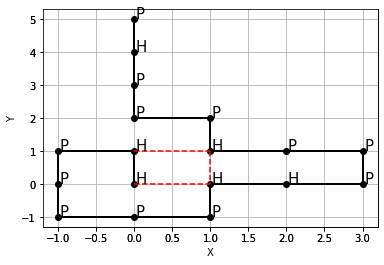

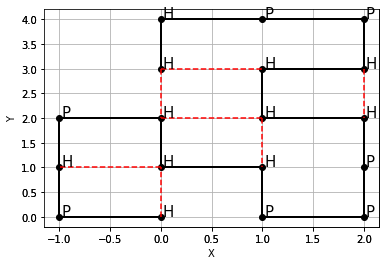

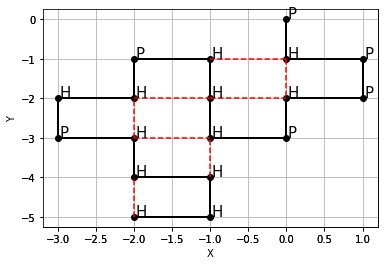

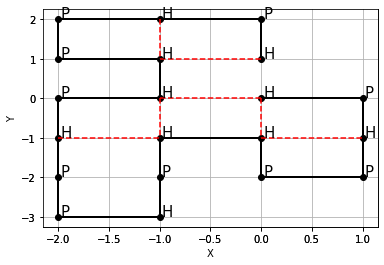

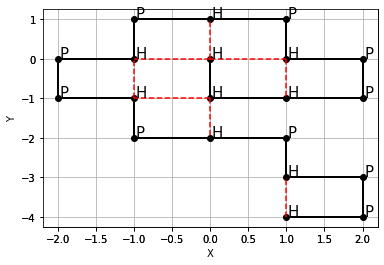

In [ ]:
import statistics  as stat
import matplotlib.pyplot as plt


seq = [
     'hhppppphhppphppphp'.upper(),
     'hphphhhppphhhhpphh'.upper(),
     'phpphphhhphhphhhhh'.upper(),
     'hphpphhphpphphhpphph'.upper(),
     'hhhpphphphpphphphpph'.upper()
]

for K,s in zip([len(x) for x in seq], seq):
  w, energy, trajectories = simulation(K, s)
  print(f'dimension:{K}, count of self avoiding random walk: {w}, {min(energy)}')

  fig, ax = plt.subplots()
  X = trajectories[np.argmin(energy),:,0]
  Y = trajectories[np.argmin(energy),:,1]
  ax.plot(X, Y, label='Random walk')
  ax = fig.add_subplot()
  ax.plot(X, Y,'ko-', linewidth=2, markersize=6)
  ax.grid(which='both')
  for i in range(len(X)): # End point
    ax.text(X[i]+0.02, Y[i]+0.02, s[i], size=15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
  e, points = total_energy(s, X, Y)
  for x in range(points.shape[0]):
    ax.plot([points[x][0][0], points[x][1][0]], [points[x][0][1], points[x][1][1]], color='red',linestyle='--')
  plt.savefig(f'2d{s}.png')
